# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [18]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [20]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [21]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [22]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = BeautifulSoup(html, "html.parser")
mars_soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [23]:
# Extract all rows of data
# Find the table in the HTML
table = mars_soup.find('table')  # Locate the first <table> element

# Extract all rows from the table
rows = table.find_all('tr')  # Get all <tr> tags (table rows)

# Extract data from each row
data = []
for row in rows:
    # Get all cells in the row (<td> for data, <th> for headers)
    cells = row.find_all(['td', 'th'])
    # Extract the text from each cell
    row_data = [cell.get_text(strip=True) for cell in cells]
    data.append(row_data)

# Convert the extracted data into a Pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)



         0                 1     2    3      4         5         6
0       id  terrestrial_date   sol   ls  month  min_temp  pressure
1        2        2012-08-16    10  155      6     -75.0     739.0
2       13        2012-08-17    11  156      6     -76.0     740.0
3       24        2012-08-18    12  156      6     -76.0     741.0
4       35        2012-08-19    13  157      6     -74.0     732.0
...    ...               ...   ...  ...    ...       ...       ...
1863  1889        2018-02-23  1973  133      5     -78.0     730.0
1864  1892        2018-02-24  1974  134      5     -77.0     729.0
1865  1894        2018-02-25  1975  134      5     -76.0     729.0
1866  1893        2018-02-26  1976  135      5     -77.0     728.0
1867  1895        2018-02-27  1977  135      5     -77.0     727.0

[1868 rows x 7 columns]


In [24]:
df.to_csv("mars_temperature_data.csv", index=False)
print("Data saved to mars_temperature_data.csv")

Data saved to mars_temperature_data.csv


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [26]:
#Find the table in the HTML 
table = mars_soup.find('table')  # Locate the first <table> element

# Create an empty list
data_rows = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr'):  # Iterate through all <tr> elements
    cell_values = row.find_all(['td', 'th'])  # Find all cells (data and headers)
    values = [cell.get_text(strip=True) for cell in cell_values]  # Extract text and strip whitespace
    data_rows.append(values)  # Append the list of values to data_rows

#Display the extracted data
print(data_rows)


[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'], ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', 

In [27]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data_rows, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])


In [28]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [29]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [32]:
# Change data types for data analysis
mars_df["id"] = pd.to_numeric(mars_df["id"], errors='coerce')  # Non-numeric values become NaN
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"], errors='coerce')  # Invalid dates become NaT
mars_df["sol"] = pd.to_numeric(mars_df["sol"], errors='coerce')
mars_df["ls"] = pd.to_numeric(mars_df["ls"], errors='coerce')
mars_df["month"] = pd.to_numeric(mars_df["month"], errors='coerce')
mars_df["min_temp"] = pd.to_numeric(mars_df["min_temp"], errors='coerce')
mars_df["pressure"] = pd.to_numeric(mars_df["pressure"], errors='coerce')

# Display the first few rows to verify the changes
print(mars_df.head())

# Optionally, drop rows with NaN values if they are not needed
mars_df = mars_df.dropna()
print("Data cleaned and NaN values dropped.")


     id terrestrial_date   sol     ls  month  min_temp  pressure
0   NaN              NaT   NaN    NaN    NaN       NaN       NaN
1   2.0       2012-08-16  10.0  155.0    6.0     -75.0     739.0
2  13.0       2012-08-17  11.0  156.0    6.0     -76.0     740.0
3  24.0       2012-08-18  12.0  156.0    6.0     -76.0     741.0
4  35.0       2012-08-19  13.0  157.0    6.0     -74.0     732.0
Data cleaned and NaN values dropped.


/var/folders/wk/vzkljmbn69z9h93ss7k50dph0000gn/T/ipykernel_14418/2640059524.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"], errors='coerce')  # Invalid dates become NaT


In [33]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                         float64
terrestrial_date    datetime64[ns]
sol                        float64
ls                         float64
month                      float64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [37]:
# 1. How many months are there on Mars?
mars_df['month'].max()

numeric_month = int(mars_df['month'].max())
print(numeric_month)  # Output: 12

12


In [38]:
# 2. How many sols (Martian days) worth of data are there?
length_of_list = len(mars_df)
mars_days_max = mars_df["sol"].max()
mars_days_min = mars_df["sol"].min()
mars_days = mars_days_max - mars_days_min
print(f"Total number of data entries: {length_of_list}")
print(f"Max recorded sol value: {mars_days_max}")
print(f"Min recoreded sol value: {mars_days_min}")
print(f"Number of Mars Days (with 100 missing entries): {mars_days}")

Total number of data entries: 1867
Max recorded sol value: 1977.0
Min recoreded sol value: 10.0
Number of Mars Days (with 100 missing entries): 1967.0


In [39]:
# 3. What is the average minimum temperature by month?
average_low_temp = mars_df["min_temp"].groupby(mars_df['month']).mean()
average_low_temp

month
1.0    -77.160920
2.0    -79.932584
3.0    -83.307292
4.0    -82.747423
5.0    -79.308725
6.0    -75.299320
7.0    -72.281690
8.0    -68.382979
9.0    -69.171642
10.0   -71.982143
11.0   -71.985507
12.0   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'average_low_temp')

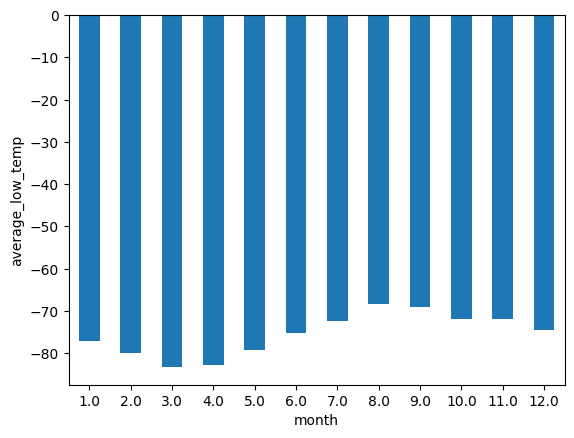

In [40]:
# Plot the average minimum temperature by month
average_low_temp.plot.bar(rot = 0)
plt.ylabel("average_low_temp")

In [41]:
# 1. How many months are there on Mars?
mars_df['month'].max()

numeric_month = int(mars_df['month'].max())
print(numeric_month)  # Output: 12

12


In [42]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
hottest_month = average_low_temp.idxmax()
hottest_month_temp = average_low_temp.max()
coldest_month = average_low_temp.idxmin()
coldest_month_temp = average_low_temp.min()
print(f"Month #{hottest_month} had the hottest average temperature of {hottest_month_temp}")
print(f"Month #{coldest_month} had the coldest average temperature of {coldest_month_temp}")


Month #8.0 had the hottest average temperature of -68.38297872340425
Month #3.0 had the coldest average temperature of -83.30729166666667


In [44]:
# 4. What is the average pressure by month?
avg_pressure_monthly = mars_df["pressure"].groupby(mars_df["month"]).mean()
average_pressure_by_month = mars_df.groupby('month')['pressure'].mean()

# Display the result
print(average_pressure_by_month)

month
1.0     862.488506
2.0     889.455056
3.0     877.322917
4.0     806.329897
5.0     748.557047
6.0     745.054422
7.0     795.105634
8.0     873.829787
9.0     913.305970
10.0    887.312500
11.0    857.014493
12.0    842.156627
Name: pressure, dtype: float64


Text(0, 0.5, 'Pressure (mmHg)')

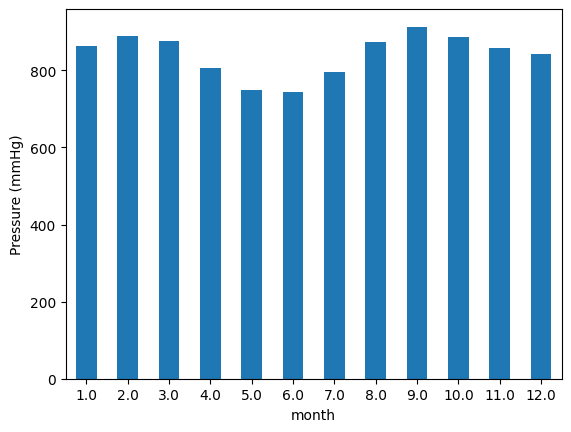

In [47]:
# Plot the average pressure by month
avg_pressure_monthly.plot.bar(rot=0)
plt.ylabel("Pressure (mmHg)")


Lowest pressure month: 6.0 with 745.0544217687075 mmHg
Highest pressure month: 9.0 with 913.3059701492538 mmHg


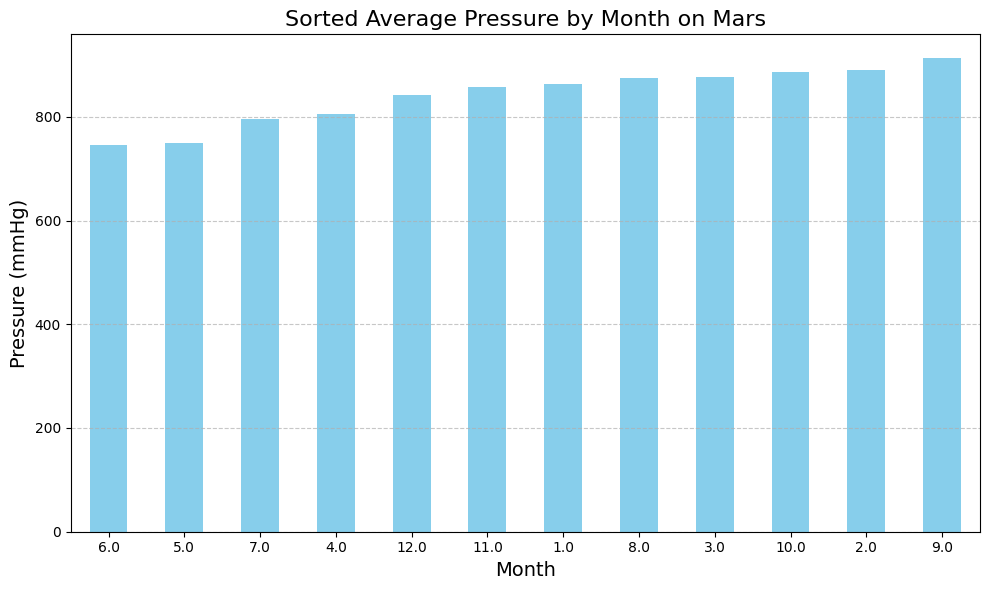

In [56]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Plot the sorted average pressure by month

sorted_pressure = avg_pressure_monthly.sort_values()

# Identify the lowest and highest pressure months
lowest_pressure_month = sorted_pressure.idxmin()
highest_pressure_month = sorted_pressure.idxmax()

# Display the results
print(f"Lowest pressure month: {lowest_pressure_month} with {sorted_pressure.min()} mmHg")
print(f"Highest pressure month: {highest_pressure_month} with {sorted_pressure.max()} mmHg")

# Plot the sorted average pressure by month
sorted_pressure.plot.bar(rot=0, color='skyblue', figsize=(10, 6))

# Add labels and title
plt.title("Sorted Average Pressure by Month on Mars", fontsize=16)
plt.ylabel("Pressure (mmHg)", fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/wk/vzkljmbn69z9h93ss7k50dph0000gn/T/ipykernel_14418/1546897814.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mars_df['month'] = ((mars_df['sol'] // 30) + 1).astype(int)  # Simple approximation


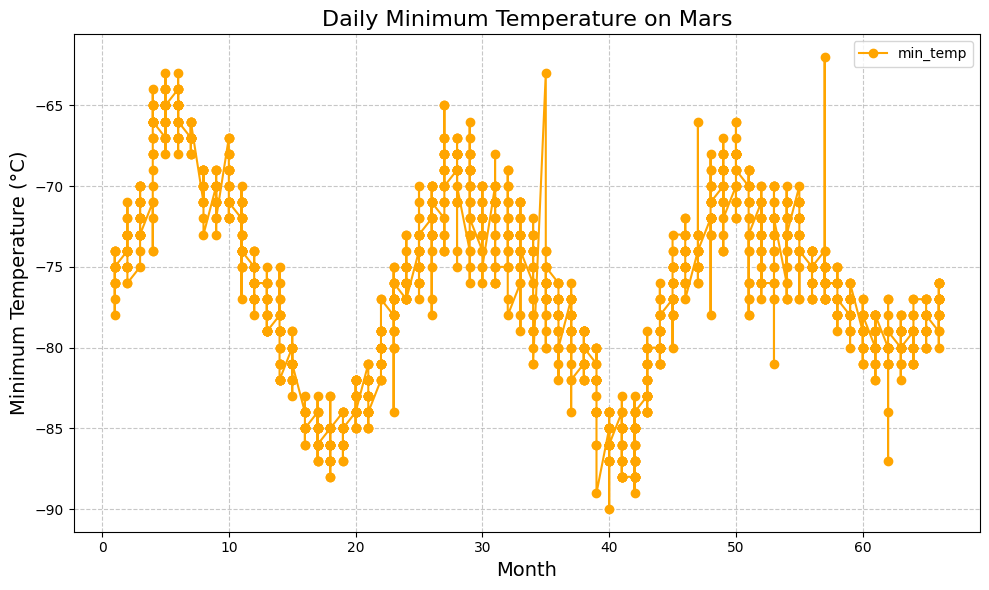

In [60]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Modify this logic based on how months are defined in your data.
mars_df['month'] = ((mars_df['sol'] // 30) + 1).astype(int)  # Simple approximation
# Plot the daily minimum temperature with months on the X-axis
mars_df.plot(x='month', y='min_temp', kind='line', marker='o', color='orange', figsize=(10, 6))

# Customize the plot
plt.title('Daily Minimum Temperature on Mars', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Minimum Temperature (°C)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

#### Minimum Temperature

YOUR ANALYSIS HERE

Month #3.0 had the coldest average temperature of -83.30729166666667

#### Atmospheric Pressure

YOUR ANALYSIS HERE


Atmospheric pressure is, on average, lowest in the sixth month at 745.054422, and highest in month nine at  873.829787.

#### Year Length

YOUR ANALYSIS HERE

The distance from peak to peak is roughly 675 days. A year on Mars appears to be about 675 days from the plot.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [66]:
# Write the data to a CSV
output_path = "mars_data.csv"
new_mars_df.to_csv(output_path)

In [67]:
browser.quit()